In [150]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [151]:
#Carga de datos
df = pd.read_csv('ventas_videojuegos_2024.csv')
print(df.shape)
df.head()

(64016, 14)


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [152]:
# Verificar datos nulos
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
critic_score,6678,57338,89.57
jp_sales,6726,57290,89.49
na_sales,12637,51379,80.26
pal_sales,12824,51192,79.97
other_sales,15128,48888,76.37
last_update,17879,46137,72.07
total_sales,18922,45094,70.44
release_date,56965,7051,11.01
developer,63999,17,0.03
publisher,64016,0,0.00


In [153]:
#Revisión de columnas
df.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

In [154]:
#Revisión de valores nulos en la columna con mayor porcentaje de valores nulos, 'critic score'
df.loc[df.isnull()['critic_score']]

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
23,/games/boxart/full_2236292AmericaFrontccc.png,Halo 4,X360,Shooter,Microsoft Studios,343 Industries,NaN,9.96,6.72,0.04,2.36,0.83,2012-11-06,NaN
25,/games/boxart/full_6532460AmericaFrontccc.jpg,Call of Duty: Black Ops IIII,PS4,Shooter,Activision,Treyarch,NaN,9.32,4.05,0.50,3.28,1.49,2018-10-12,2018-11-07
26,/games/boxart/full_5970958AmericaFrontccc.jpg,FIFA 19,PS4,Sports,Electronic Arts,EA Sports,NaN,9.15,0.84,0.10,6.87,1.34,2018-09-28,2018-09-12
33,/games/boxart/full_5731689AmericaFrontccc.jpg,FIFA 13,PS3,Sports,EA Sports,EA Canada,NaN,8.01,1.07,0.13,5.13,1.68,2012-09-25,2018-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


In [155]:
# Reemplazo de valores nulos de sales por 0 para posteriormente realizar la suma para igualarla a total_sales
df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']] = df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].fillna(0)
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [156]:
# Considerando que la suma de las sales es igual a total_sales, se efectúa lo siguiente:

# Suma de columnas sales
df['sum_sales'] = df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum(axis=1)

# Rellenar nulos en total_sales con la suma 
df['total_sales'] = df['total_sales'].fillna(df['sum_sales'])

# Eliminar columna temporal de suma
df.drop(columns=['sum_sales'], inplace=True)

# Eliminar filas donde total_sales sean 0
df = df[df['total_sales'] != 0]

df.head()


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [157]:
# Verificar datos nulos again
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)


,datos sin NAs en q,Na en q,Na en %
last_update,3801,13769,78.37
critic_score,3978,13592,77.36
release_date,17508,62,0.35
developer,17568,2,0.01
title,17570,0,0.00
img,17570,0,0.00
publisher,17570,0,0.00
genre,17570,0,0.00
console,17570,0,0.00
total_sales,17570,0,0.00


In [161]:
#Regresión para calcular datos de critic_score en base a los valores de total_sales
variable = ['total_sales'] 

model = LinearRegression()

train_data = df.dropna(subset=['critic_score'] + variable)

X_train = train_data[variable]
y_train = train_data['critic_score']

model.fit(X_train,y_train)
y_pred = model.predict(X_train)


In [163]:
#Verificación 'critic_score' en df
if 'critic_score' in df.columns:
    missing_data = df[df['critic_score'].isnull()]
    X_missing = missing_data[variable]

    if not X_missing.empty:
        df.loc[df['critic_score'].isnull(), 'critic_score'] = model.predict(X_missing)
else:
    print("'critic_score' no está en el dataframe")

In [164]:
# Verificar datos nulos againn
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)


,datos sin NAs en q,Na en q,Na en %
last_update,3801,13769,78.37
release_date,17508,62,0.35
developer,17568,2,0.01
console,17570,0,0.00
title,17570,0,0.00
img,17570,0,0.00
publisher,17570,0,0.00
genre,17570,0,0.00
critic_score,17570,0,0.00
total_sales,17570,0,0.00


In [165]:
#Visualización de dataset again
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.400000,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.700000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.600000,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,11.468935,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.100000,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


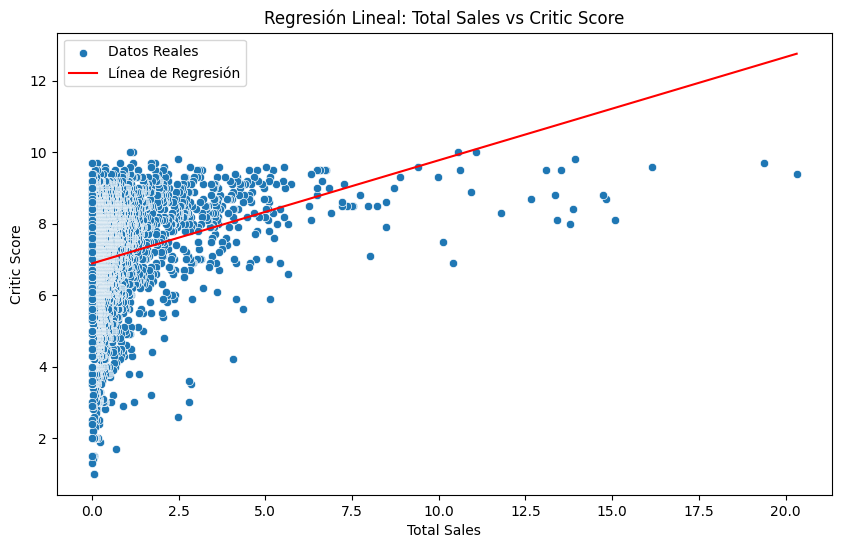

In [167]:
# Gráfico de dispersión con la línea de regresión en la cual se puede ver que a mayores ventas mayor score, sin embargo, casi todos los valores de critic_score tienden a estar entre 0 a 2.5 de total_sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['total_sales'], y=y_train, label='Datos Reales')
sns.lineplot(x=X_train['total_sales'], y=y_pred, color='red', label='Línea de Regresión')

plt.xlabel('Total Sales')
plt.ylabel('Critic Score')
plt.title('Regresión Lineal: Total Sales vs Critic Score')
plt.legend()


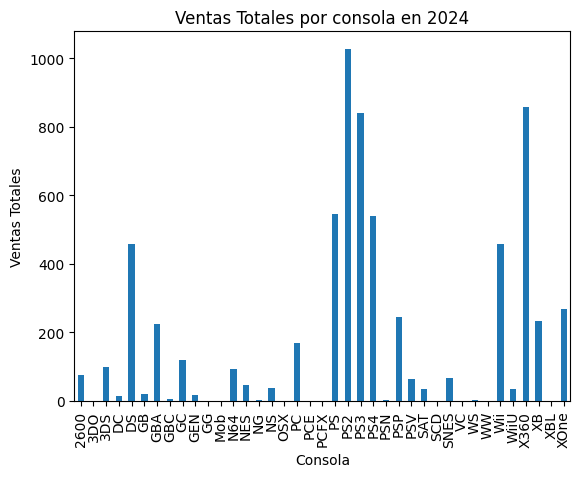

In [177]:
# Gráfico que contrasta la cantidad de ventas con respecto a las consolas en el cual se puede ver que el podio es: PS2, X360 y PS3 respectivamente

ventas_por_genero = df.groupby('console')['total_sales'].sum()
ventas_por_genero.plot(kind='bar')
plt.xlabel('Consola')
plt.ylabel('Ventas Totales')
plt.title('Ventas Totales por consola en 2024')
plt.show()

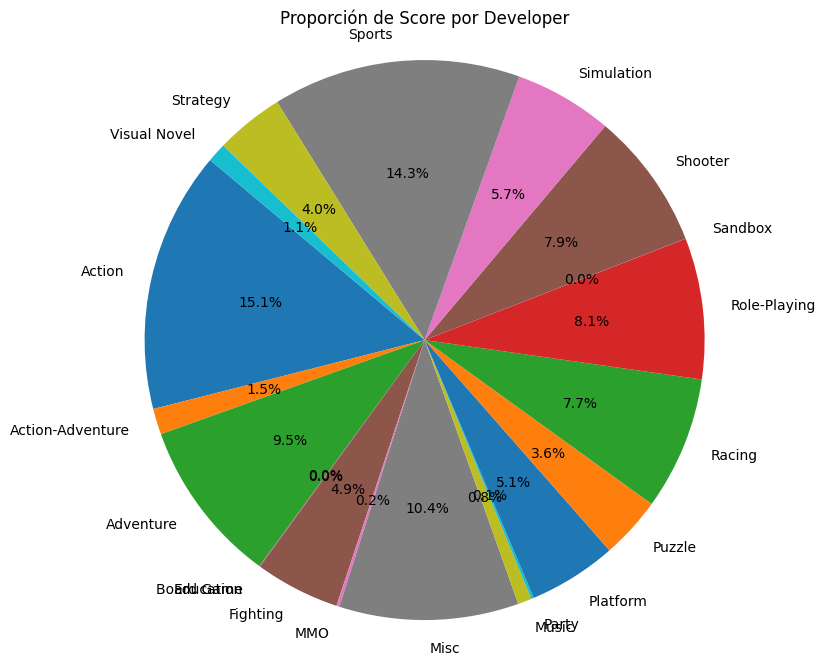

In [175]:
# Agrupar los datos por desarrollador y sumar las ventas totales en el cual se puede ver que los géneros de action y sports tienen mejores scores.
score_por_developer = df.groupby('genre')['critic_score'].sum().reset_index()

# Crear el gráfico de torta
plt.figure(figsize=(10, 8))
plt.pie(score_por_developer['critic_score'], labels=score_por_developer['genre'], autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Score por Género')
plt.axis('equal')  # Para asegurar que el gráfico de torta sea circular
plt.show()

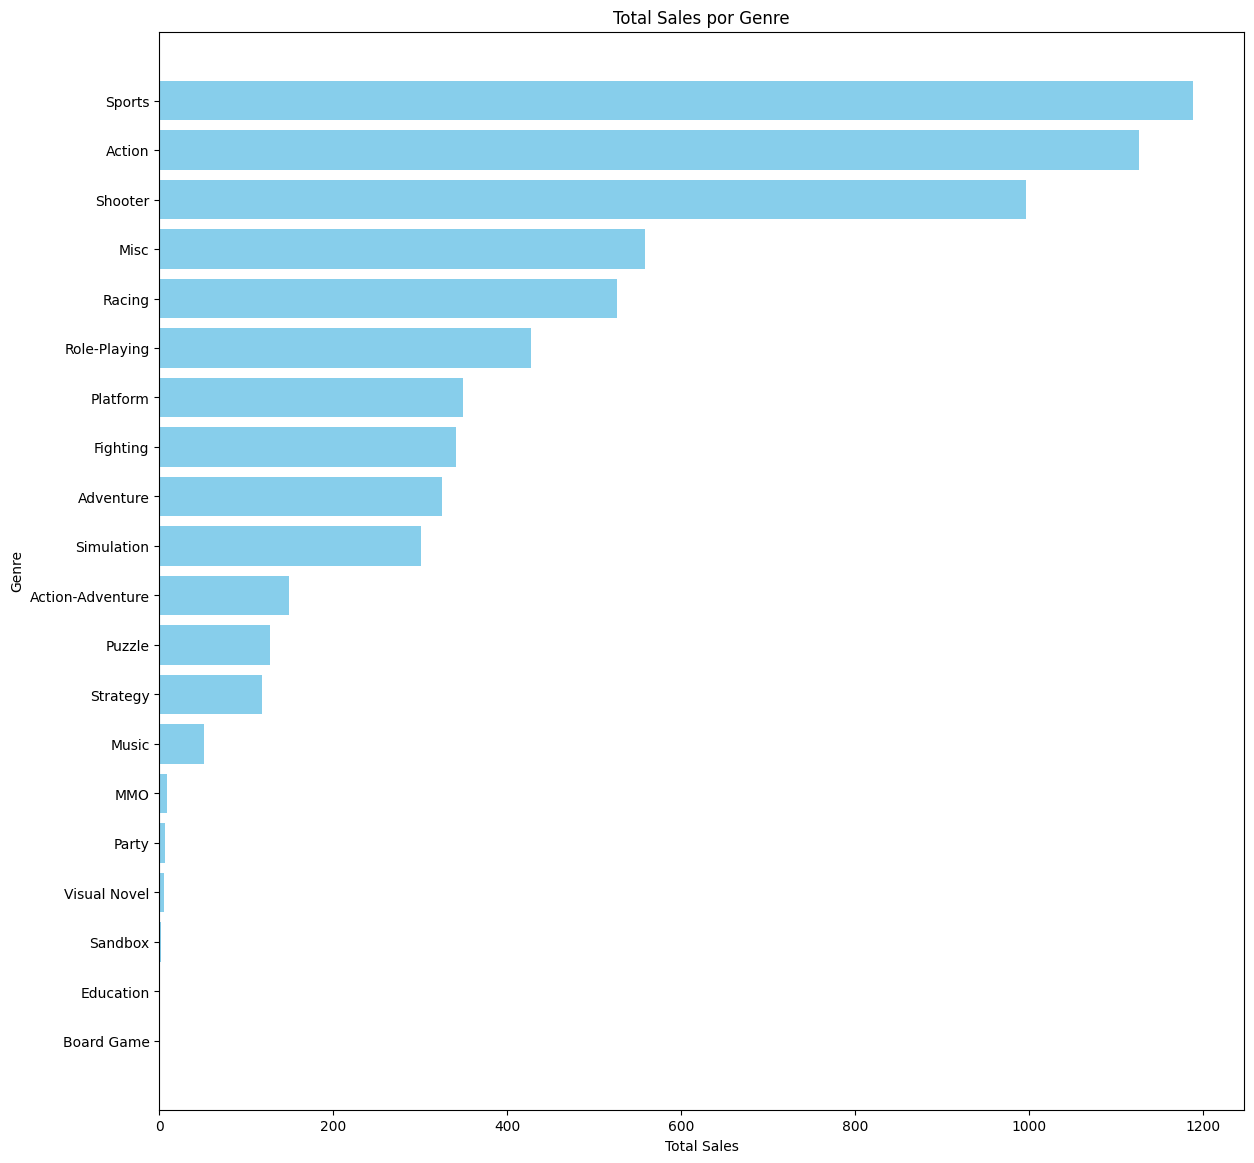

In [185]:
#En el total de ventas por género se puede visualizar que los sports, action y shooter ocupan el podio
ventas_por_genre = df.groupby('genre')['total_sales'].sum().reset_index()

# Ordenar los desarrolladores por ventas totales
ventas_por_genre = ventas_por_genre.sort_values(by='total_sales', ascending=True)
# Filtrar desarrolladores con ventas totales entre 10 y 50
#ventas_filtradas = ventas_por_developer[(ventas_por_developer['total_sales'] >= 100) & (ventas_por_developer['total_sales'] <= 250)]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(14, 14))
plt.barh(ventas_por_genre['genre'], ventas_por_genre['total_sales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Genre')
plt.title('Total Sales por Genre')
plt.show()

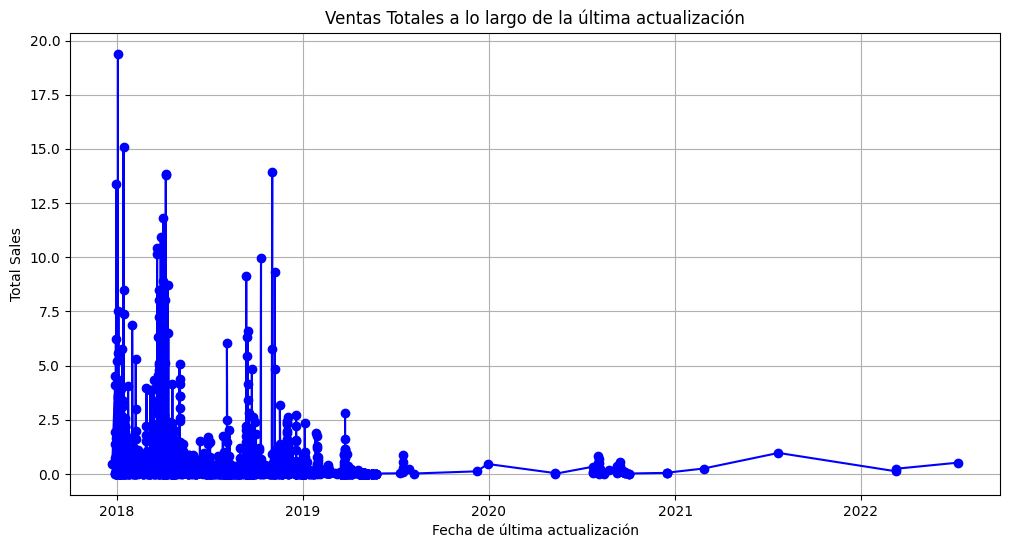

In [186]:
# Gráfico de líneas en el cual se puede visualizar que en la actualización de 2018 se produjeron más ventas en relación a los otros videojuegos y años.
df['last_update'] = pd.to_datetime(df['last_update'])

# Ordenar el DataFrame por fecha
df = df.sort_values(by='last_update')

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(df['last_update'], df['total_sales'], marker='o', linestyle='-', color='b')
plt.xlabel('Fecha de última actualización')
plt.ylabel('Total Sales')
plt.title('Ventas Totales a lo largo de la última actualización')
plt.grid(True)
plt.show()